## The Hello World of Machine Learning

- Beginners Need A Small End-to-End Project
  
- We will start with iris dataset, the hello world of machine learning

<center>

![](https://miro.medium.com/max/638/0*2c7voFri9cIXGrc4)

<center>


- Attributes are numeric so you have to figure out how to load and handle data.  

- It is a classification problem, allowing you to practice with an easier type of supervised learning algorithm.  
  
- It is a multiclass classification problem (multi-nominal) that may require some specialized handling. 
  
- It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or single sheet of paper).  
  
- All of the numeric attributes are in the same units and the same scale not requiring any special scaling or transforms to get started.

<center>

![](./images/ml_project_template.png)

<center>


### Load The Data

In this step we are going to load the libraries and the iris data CSV file from URL.

#### Import libraries


In [40]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

### Load dataset

In [9]:
dataset = pd.read_csv("./data/iris.csv")

### Summarize the Dataset

### Discriptive statistics

Now it is time to take a look at the data. In this step we are going to take a look at the data a few different ways:  
- Dimensions of the dataset.  
  
- Peek at the data itself.  
  
- Statistical summary of all attributes.  
  
- Breakdown of the data by the class variable

Dimension

In [10]:
# shape 
print(dataset.shape)

(150, 5)


It is also always a good idea to actually eyeball your data.



In [11]:
#peak the data
print(dataset.head(20))

    sepalLength  sepalWidth  petalLength  petalWidth        class
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
14        

Now we can take a look at a summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles.



In [13]:
#Statistical Summary
print(dataset.describe())

       sepalLength  sepalWidth  petalLength  petalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


> We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.



Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.



In [17]:
#class
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


> We can see that each class has the same number of instances (50 or 33% of the dataset).



### Visualize the Data

We are going to look at two types of plots:  

- Univariate plots to better understand each attribute. 
   
- Multivariate plots to better understand the relationships between attributes.

> matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.



pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:



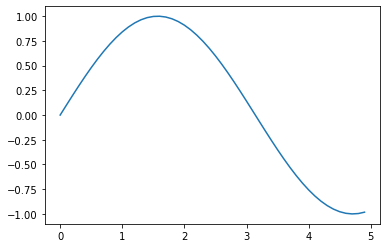

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

#### Univariate 

We will start with some univariate plots, that is, plots of each individual variable. Given that the input variables are numeric, we can create box and whisker plots of each

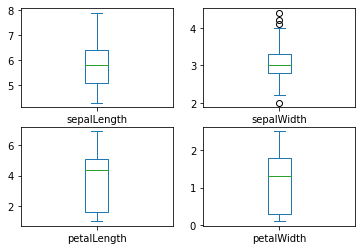

In [19]:
# box and whisker plots 
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) 

pyplot.show()

We can also create a histogram of each input variable to get an idea of the distribution

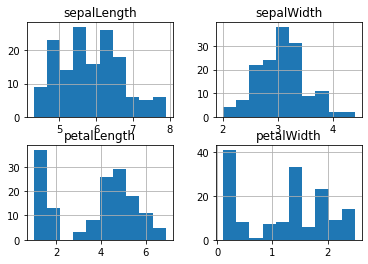

In [20]:
# histograms 
dataset.hist() 
pyplot.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.


#### Multivariate Plots

Now we can look at the interactions between the variables. First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

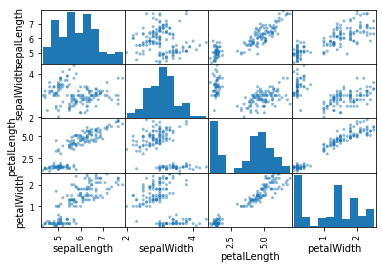

In [22]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

> Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

### Using Dataprep

In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
df = load_dataset("dataset")
create_report(df).show_browser()

## Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

- Separate out a validation dataset.
  
- Set-up the test harness to use 10-fold cross validation.
  
- Build multiple different models to predict species from flower measurements

- Select the best model.

#### Create a Validation Dataset

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset

In [25]:
array = dataset.values 

In [ ]:
array

In [24]:
# Split-out validation dataset 
X = array[:,0:4] 
Y = array[:,4] 
validation_size = 0.20 
seed = 7 

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### Test Harnes

- We will use stratified 10-fold cross validation to estimate model accuracy.

- Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

- We are using the metric of ‘accuracy‘ to evaluate models.





#### Build Models

- We don’t know which algorithms would be good on this problem or what configurations to use. 

- We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results. 
  
- Let’s evaluate six different algorithms:

- Logistic Regression (LR). 

- Linear Discriminant Analysis (LDA). 

- k-Nearest Neighbors (KNN).  

- Classification and Regression Trees (CART). 

- Gaussian Naive Bayes (NB).  

- Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. 

> We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.




In [46]:
b = []

b.append(("a", 2))
b

[('a', 2)]

In [47]:
b.append(("b", 3))

In [48]:
b

[('a', 2), ('b', 3)]

In [38]:
for x,y in b:
    print(x,y)

a 2
b 3


In [ ]:
(a,2) # tuple unpacking
[1,3] # list
{1,2,3} # set

In [ ]:
[(x,y),(z,w)]

In [49]:
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

In [41]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.053359)
KNN: 0.983333 (0.050000)
CART: 0.975000 (0.053359)
NB: 0.975000 (0.038188)
SVM: 0.991667 (0.025000)


> Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.99 



#### Select Best Model

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).



> A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

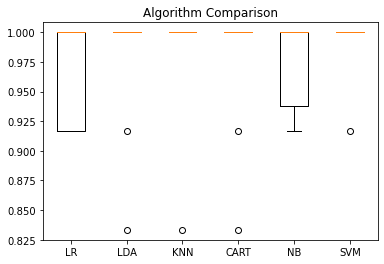

In [42]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

> We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.



In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.99 


#### Make Predictions

- We must choose an algorithm to use to make predictions.

- The results in the previous section suggest that the SVM was perhaps the most accurate model. We will use this model as our final model.

- Now we want to get an idea of the accuracy of the model on our validation set.

- This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.



> We can fit the model on the entire training dataset and make predictions on the validation dataset.


In [43]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Question

- You might also like to make predictions for single rows of data. [See](https://machinelearningmastery.com/make-predictions-scikit-learn/)

- You might also like to save the model to file and load it later to make.predictions on new data. [see](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)


##### Evaluate Predictions

In [44]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



> We can see that the accuracy is 0.93 or about 93% on the hold out dataset.



> The confusion matrix provides an indication of the errors made.



Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).



#### Summary

In this lesson you discovered step-by-step how to complete your first machine learning project in Python. You discovered that completing a small end-to-end project from loading the data to making predictions is the best way to get familiar with the platform

### Next Step

Next you will take things one step further and work through a regression predictive modeling problem. It will be a slightly more complex project and involve data transforms, algorithm tuning and use of ensemble methods to improve results.